<a href="https://colab.research.google.com/github/Vishall1221/EDA_Project_22BDS0184/blob/main/Phase_1/22BDS0184.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.patches as mpatches
from scipy import stats

# --- Load the Dataset from GitHub URL ---

In [2]:
url = 'https://raw.githubusercontent.com/Vishall1221/EDA/main/Data/bcancer.csv'
df = pd.read_csv(url)

In [3]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


# -- Dimensions of the dataset --

In [4]:
print("Dimensions of the dataset:")
print(df.shape)

Dimensions of the dataset:
(569, 33)


# -- Summary Statistics --

In [5]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064   

### -- Data Information (types and non-null counts) --

In [6]:
print("Data Information:")
df.info()

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimete

# --- Data Cleaning and Preprocessing ---

In [7]:
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal

In [8]:
# 'Unnamed: 32' is an empty column that needs to be removed.
if 'Unnamed: 32' in df.columns:
    df = df.drop(['id', 'Unnamed: 32'], axis=1)
elif 'id' in df.columns:
    df = df.drop('id', axis=1)

In [9]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
df.shape

(569, 31)

In [11]:
df['diagnosis'].head(10)

,diagnosis
0,M
1,M
2,M
3,M
4,M
5,M
6,M
7,M
8,M
9,M


### Convert the categorical 'diagnosis' (M/B) to a numerical format (1/0).

In [12]:
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

print("Data after cleaning and encoding:")
print(df['diagnosis'].head())

Data after cleaning and encoding:
0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64


# --- Exploratory Data Analysis & Visualization ---

## 1) -- Univariate Analysis --


**--- Measures of Central Tendency ---**

In [13]:
diagnosis_labels = df['diagnosis'].copy()

In [14]:
print("--- Measures of Central Tendency for Key Features ---")
features_to_analyze = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

--- Measures of Central Tendency for Key Features ---


In [15]:
for feature in features_to_analyze:
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    mode_val = df[feature].mode()[0]
    print(f"\nFeature: {feature}")
    print(f"  - Mean:   {mean_val:.2f}")
    print(f"  - Median: {median_val:.2f}")
    print(f"  - Mode:   {mode_val:.2f}")


Feature: radius_mean
  - Mean:   14.13
  - Median: 13.37
  - Mode:   12.34

Feature: texture_mean
  - Mean:   19.29
  - Median: 18.84
  - Mode:   14.93

Feature: perimeter_mean
  - Mean:   91.97
  - Median: 86.24
  - Mode:   82.61

Feature: area_mean
  - Mean:   654.89
  - Median: 551.10
  - Mode:   512.20


**# --- b) Count Plot for Categorical Data ---**

--- Generating Count Plot for Diagnosis ---


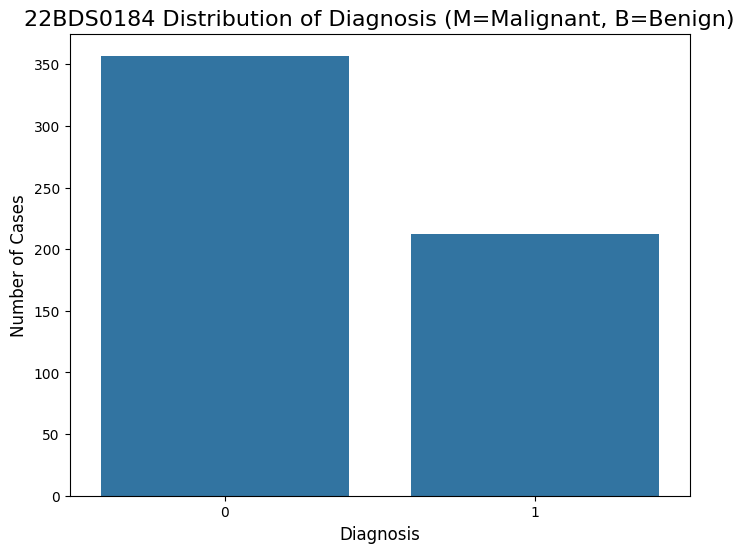

In [16]:
print("--- Generating Count Plot for Diagnosis ---")
plt.figure(figsize=(8, 6))
sns.countplot(x=diagnosis_labels, order=diagnosis_labels.value_counts().index)
plt.title("22BDS0184 Distribution of Diagnosis (M=Malignant, B=Benign)", fontsize=16)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.show()


--- Generating Distribution Plots ---


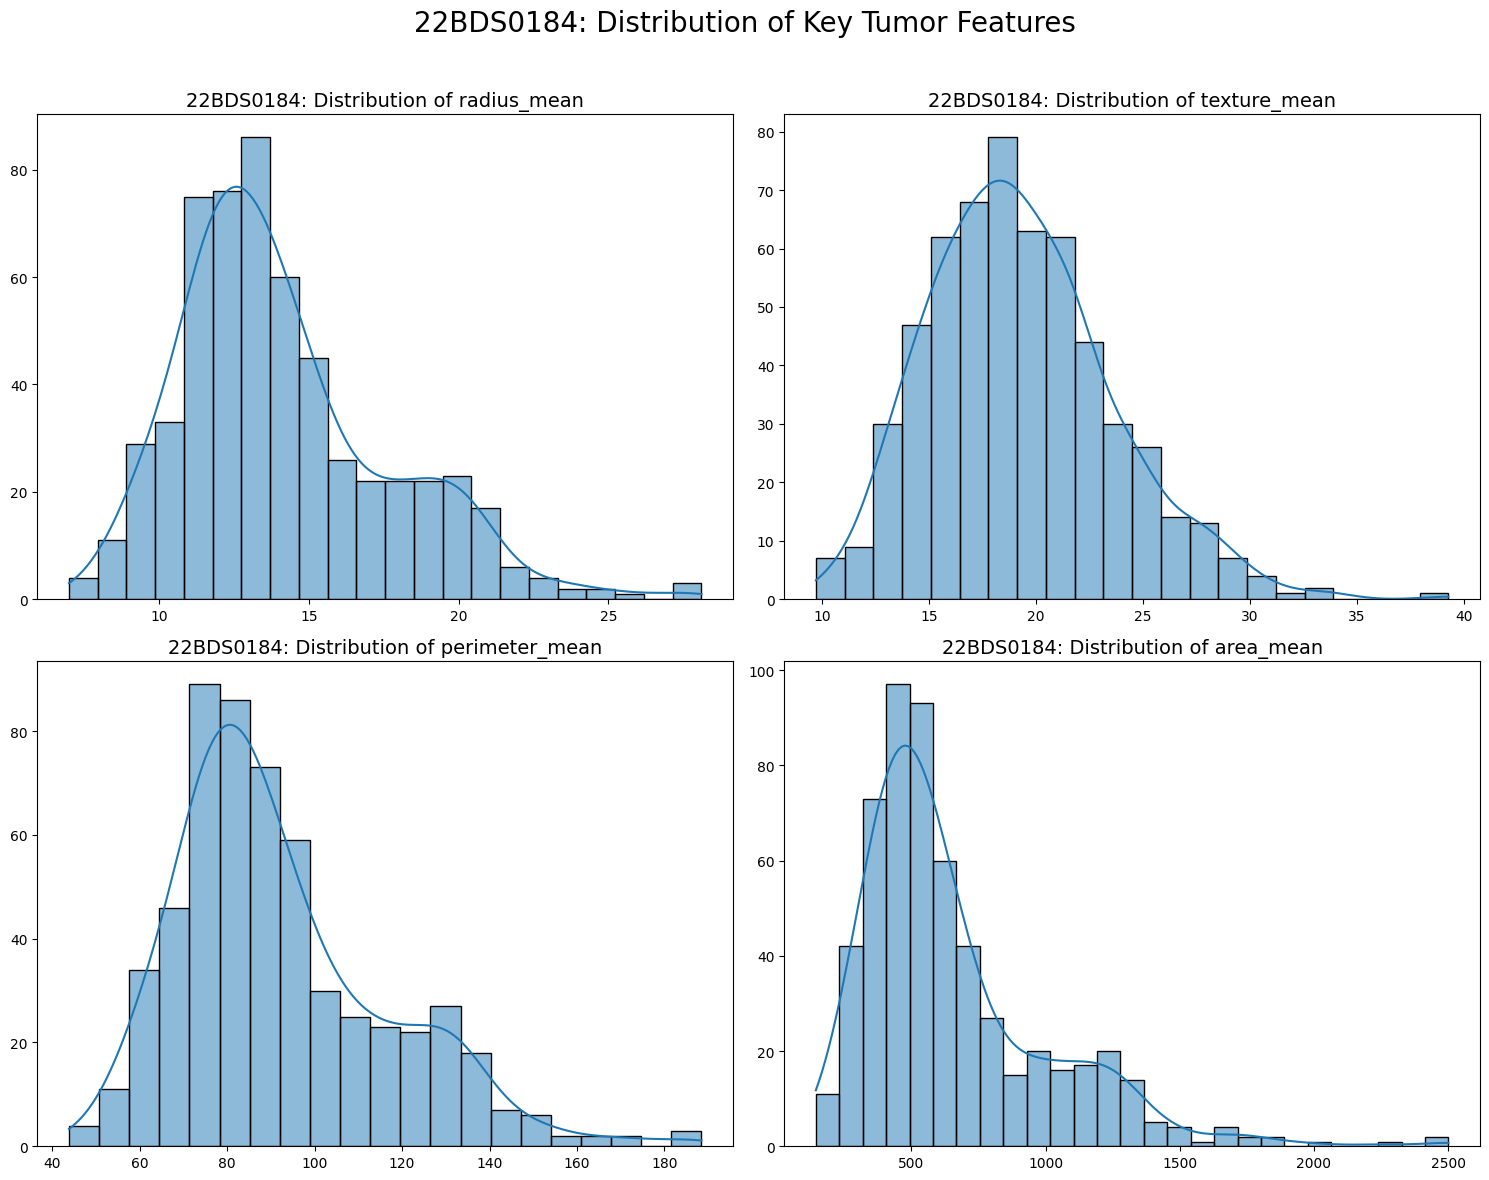

In [17]:
# --- Distribution Plots (2x2 Grid) ---
print("\n--- Generating Distribution Plots ---")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('22BDS0184: Distribution of Key Tumor Features', fontsize=20)

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, feature in enumerate(features_to_analyze):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'22BDS0184: Distribution of {feature}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Analysis of Distribution Plots**

This grid shows the distribution for four key features of the tumor cells.

For radius_mean, perimeter_mean, and area_mean, we can see that the data is right-skewed. This means that most tumors have a smaller radius, perimeter, and area, with a few cases having significantly larger measurements. For example, in area_mean, the highest concentration of tumors have an area between roughly 300 and 800, but there's a long tail extending past 2000.

For texture_mean, the distribution is more symmetric and resembles a normal distribution (a bell curve). This indicates that the texture values are evenly spread around a central value, which appears to be around 18-19.


--- Generating Boxplots ---


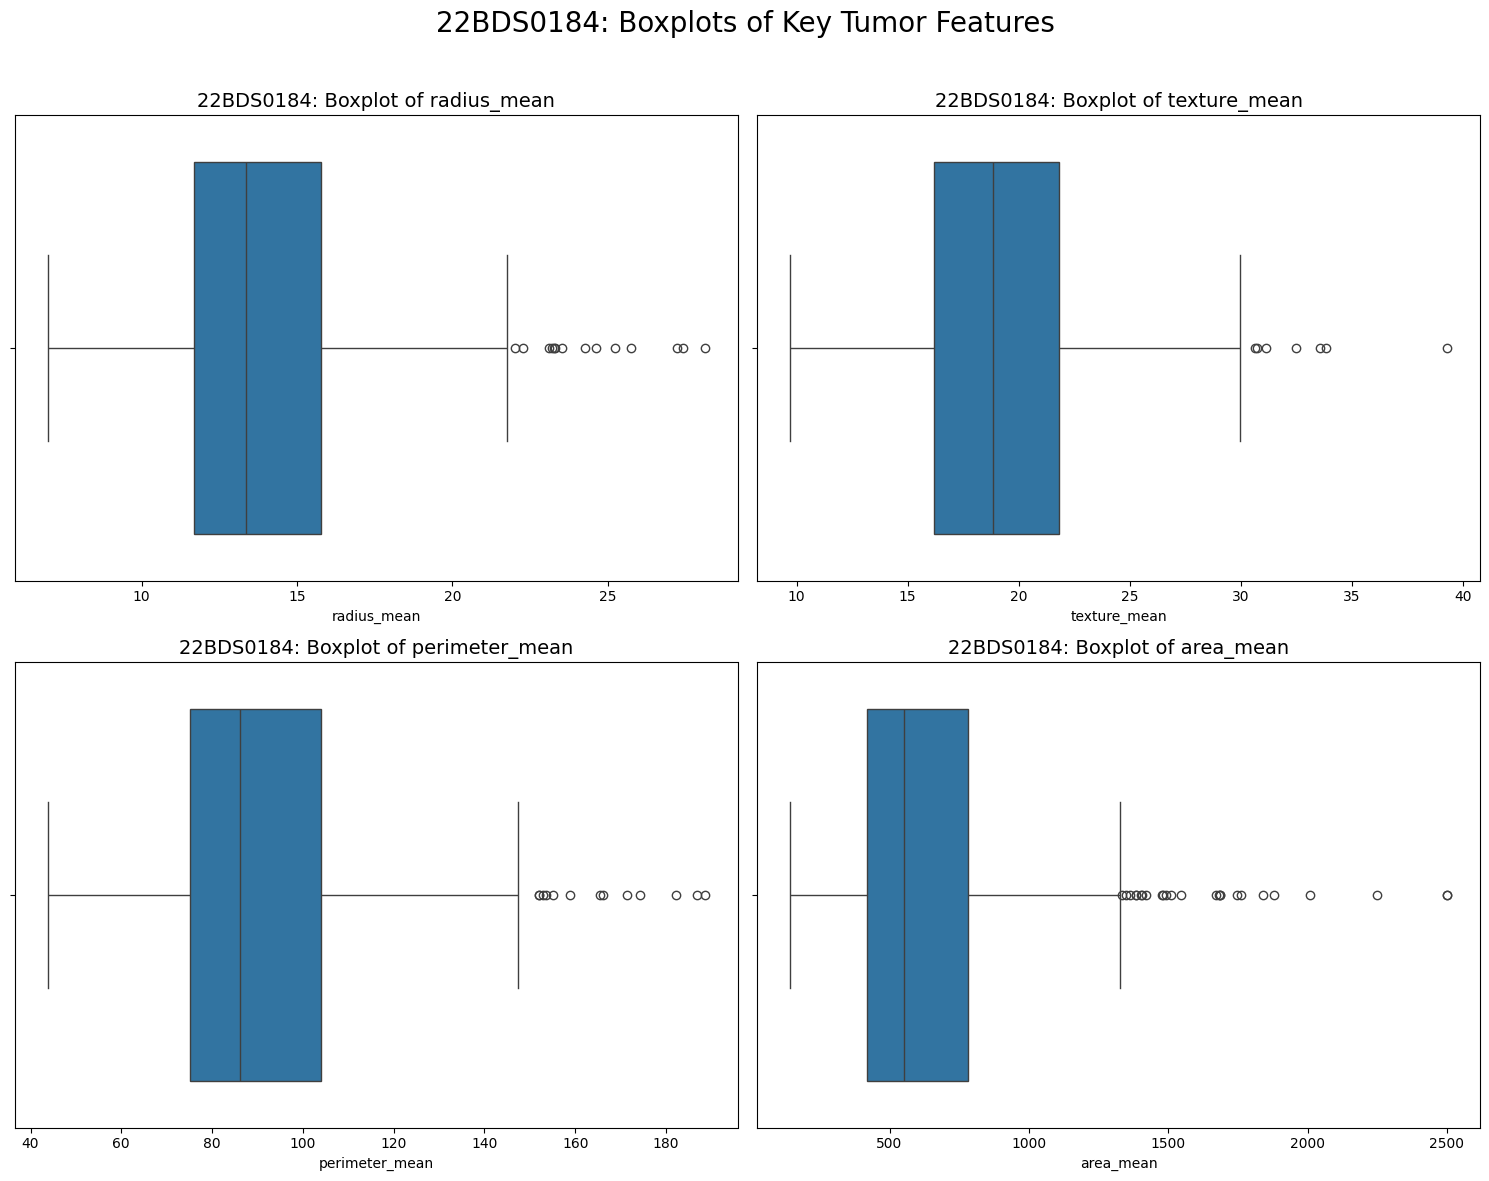

In [18]:
# --- Boxplots (2x2 Grid) ---
print("\n--- Generating Boxplots ---")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('22BDS0184: Boxplots of Key Tumor Features', fontsize=20)

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, feature in enumerate(features_to_analyze):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'22BDS0184: Boxplot of {feature}', fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()

**Analysis of Boxplots**

The boxplots for radius_mean, perimeter_mean, and area_mean confirm the right-skewed nature we saw in the histograms. The main "box" (representing the middle 50% of the data) is concentrated on the left side of the plot range.

Crucially, these three plots show several outliers on the higher end (the individual dots on the right). These points represent tumors that are exceptionally large in size compared to the rest of the cases.

The boxplot for texture_mean is more balanced, with the median line situated near the center of the box. It also has a few outliers on both the low and high ends, indicating some tumors have unusually uniform or varied textures.

## --- 2. Bivariate Analysis ---

In [19]:
print("--- Correlation Coefficients ---")
corr_radius_perimeter = np.corrcoef(df["radius_mean"], df["perimeter_mean"])
print("\nCorrelation between 'radius_mean' and 'perimeter_mean':")
print(corr_radius_perimeter)

--- Correlation Coefficients ---

Correlation between 'radius_mean' and 'perimeter_mean':
[[1.         0.99785528]
 [0.99785528 1.        ]]


radius_mean & perimeter_mean → Strong positive correlation (0.998), meaning they increase together almost perfectly.

In [20]:
corr_radius_texture = np.corrcoef(df["radius_mean"], df["texture_mean"])
print("\nCorrelation between 'radius_mean' and 'texture_mean':")
print(corr_radius_texture)


Correlation between 'radius_mean' and 'texture_mean':
[[1.         0.32378189]
 [0.32378189 1.        ]]


radius_mean & texture_mean → Weak positive correlation (0.324), meaning they slightly increase together.


--- Generating Scatter Plots ---


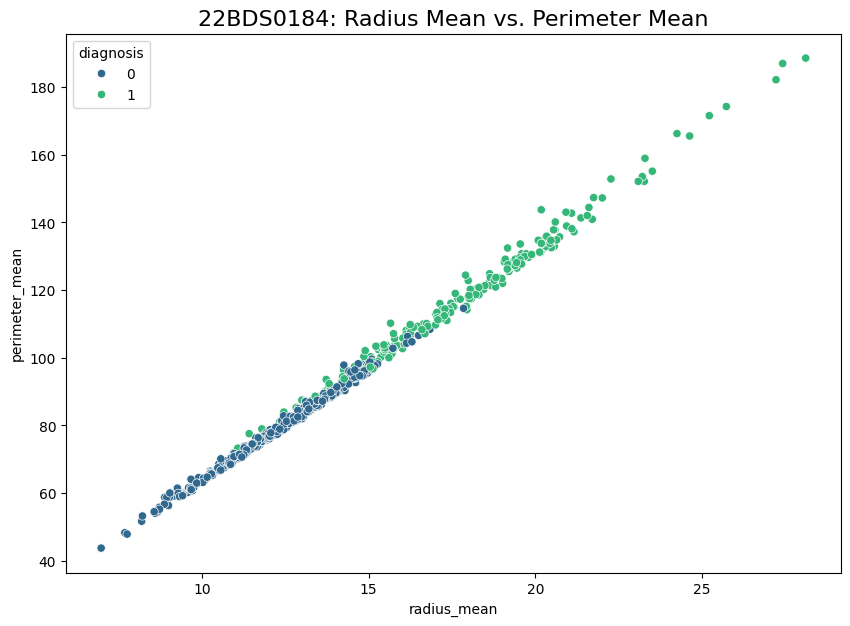

In [21]:
print("\n--- Generating Scatter Plots ---")
plt.figure(figsize=(10, 7))
sns.scatterplot(x='radius_mean', y='perimeter_mean', hue='diagnosis', data=df, palette='viridis')
plt.title('22BDS0184: Radius Mean vs. Perimeter Mean', fontsize=16)
plt.show()

radius_mean vs. perimeter_mean: This plot shows a near-perfect, positive linear relationship. The points form a tight, straight line, which tells us that as the tumor's radius increases, its perimeter increases in a highly predictable way. These two features are so strongly correlated that they essentially measure the same thing: the tumor's size.

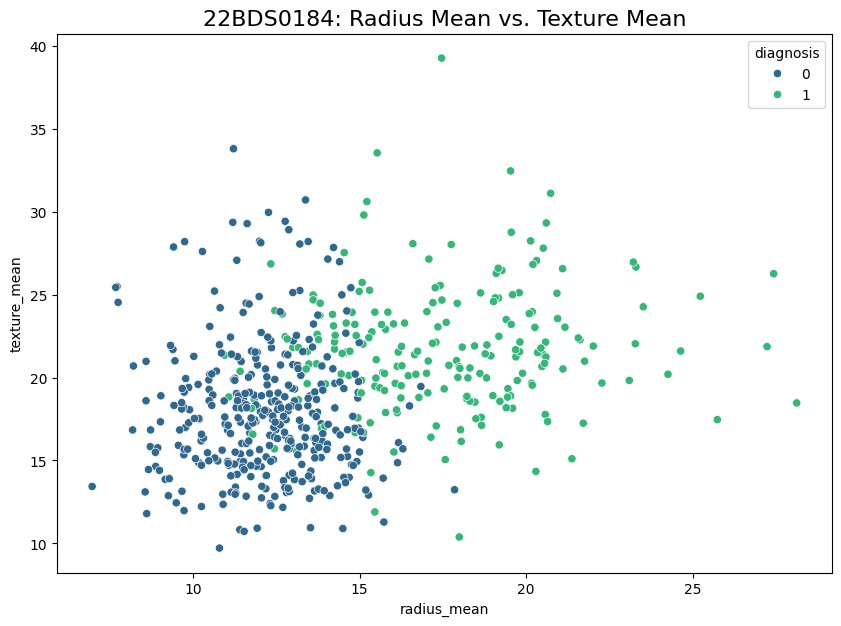

In [22]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=df, palette='viridis')
plt.title('22BDS0184: Radius Mean vs. Texture Mean', fontsize=16)
plt.show()

radius_mean vs. texture_mean: This plot shows a much weaker, more scattered positive relationship. While there is a general trend for larger tumors to have higher texture values, the connection is not strong. This indicates that size and texture are distinct features that provide different kinds of information about the tumor.

/tmp/ipython-input-3051575662.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y='radius_mean', data=df, palette='magma')


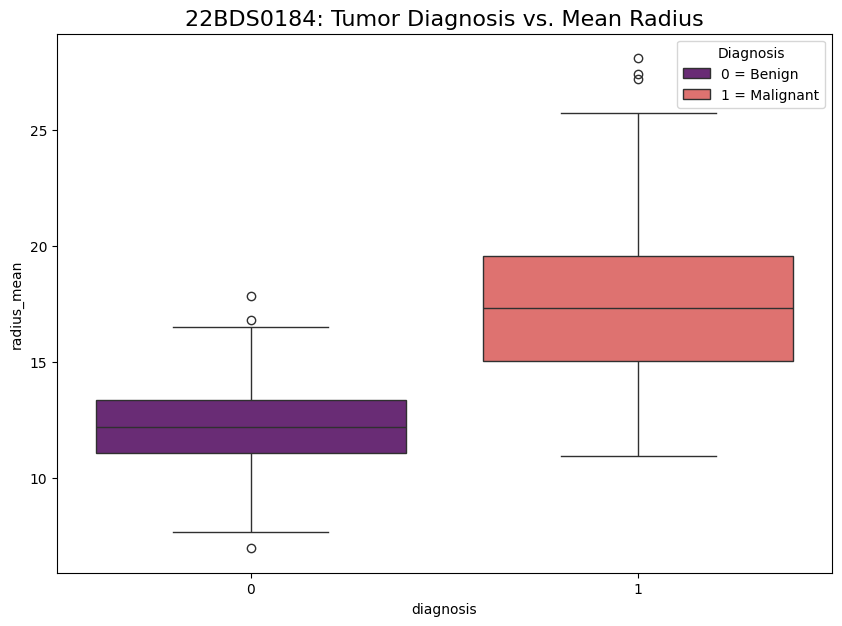

In [23]:
# Box Plot 1: Diagnosis vs. Radius Mean
plt.figure(figsize=(10, 7))
sns.boxplot(x='diagnosis', y='radius_mean', data=df, palette='magma')
plt.title('22BDS0184: Tumor Diagnosis vs. Mean Radius', fontsize=16)
plt.legend(title='Diagnosis', labels=['0 = Benign', '1 = Malignant'], loc='upper right')
plt.show()

diagnosis vs. radius_mean: This plot reveals a powerful distinction between malignant (M) and benign (B) tumors. The entire "box" for malignant tumors is located at a higher radius value than the box for benign tumors, with very little overlap. This makes radius_mean an excellent feature for predicting whether a tumor is malignant.

/tmp/ipython-input-4208068103.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y='texture_mean', data=df, palette='magma')


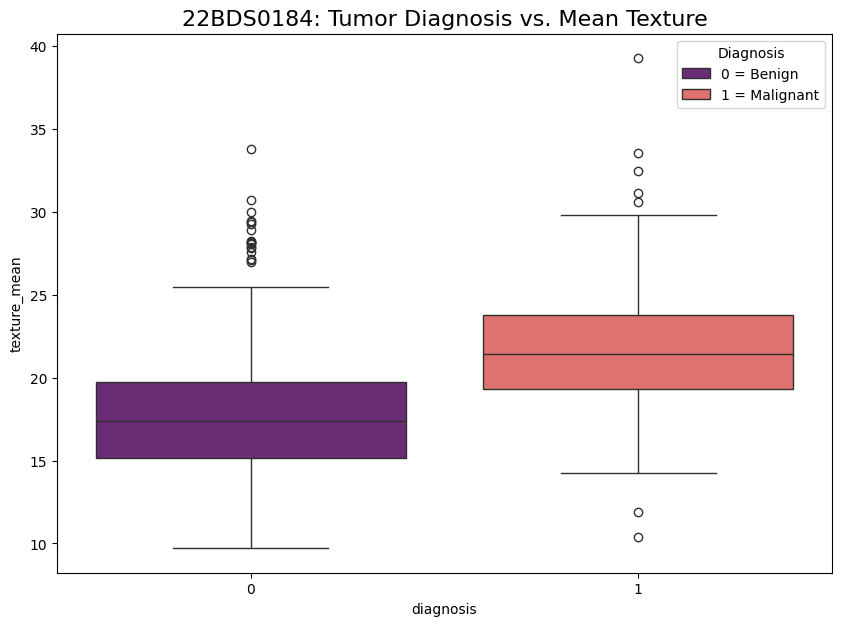

In [24]:
# Box Plot 2: Diagnosis vs. Texture Mean
plt.figure(figsize=(10, 7))
sns.boxplot(x='diagnosis', y='texture_mean', data=df, palette='magma')
plt.title('22BDS0184: Tumor Diagnosis vs. Mean Texture', fontsize=16)
plt.legend(title='Diagnosis', labels=['0 = Benign', '1 = Malignant'], loc='upper right')
plt.show()

diagnosis vs. texture_mean: This plot also shows a difference, with malignant tumors tending to have higher texture values. However, there is significant overlap in the data ranges for benign and malignant tumors. This means that while texture is a useful feature, it is not as strong or decisive a predictor as the tumor's radius.

## --- 3. Multivariate Analysis ---

**# --- a) Pair Plot with Regression Lines ---**

--- Generating Pair Plot with Regression ---


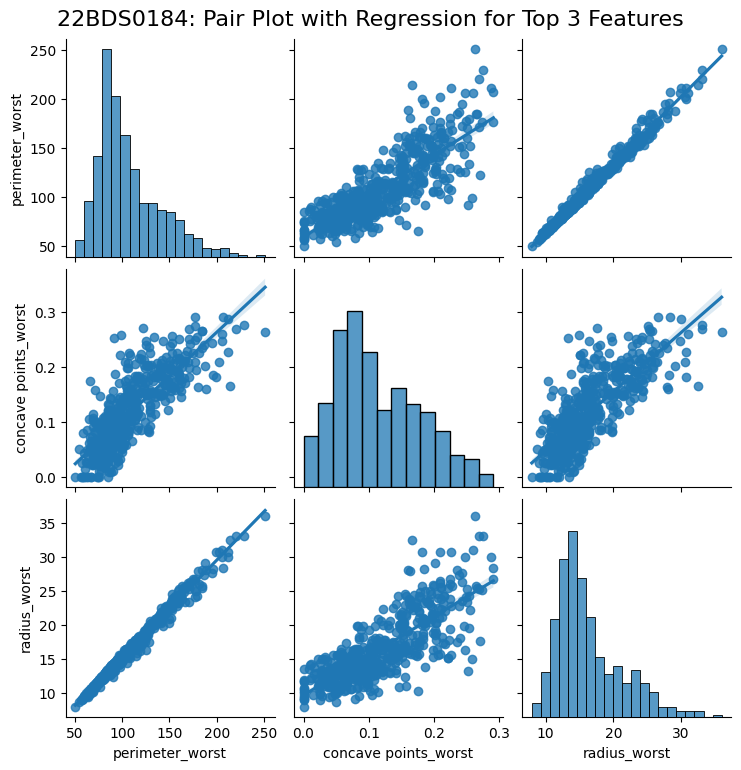

In [25]:
print("--- Generating Pair Plot with Regression ---")
sns.pairplot(
    df,
    vars=['perimeter_worst', 'concave points_worst', 'radius_worst'],
    kind="reg"  # Adds a regression line to scatter plots
)
plt.suptitle('22BDS0184: Pair Plot with Regression for Top 3 Features', y=1.02, fontsize=16)
plt.show()

Perfect linear correlation (R≈1.0) between perimeter_worst and radius_worst with tight regression line - confirms geometric redundancy

Strong positive correlations across all feature pairs with clear linear trends - indicates these top 3 features move together systematically

Normal distributions visible in histograms suggest no major skewness or outlier issues for modeling

High multicollinearity confirmed - all three features are highly intercorrelated, requiring dimensionality reduction or feature selection

**# --- b) Pair Plot with Hue for Categorization ---**


--- Generating Pair Plot with Hue ---


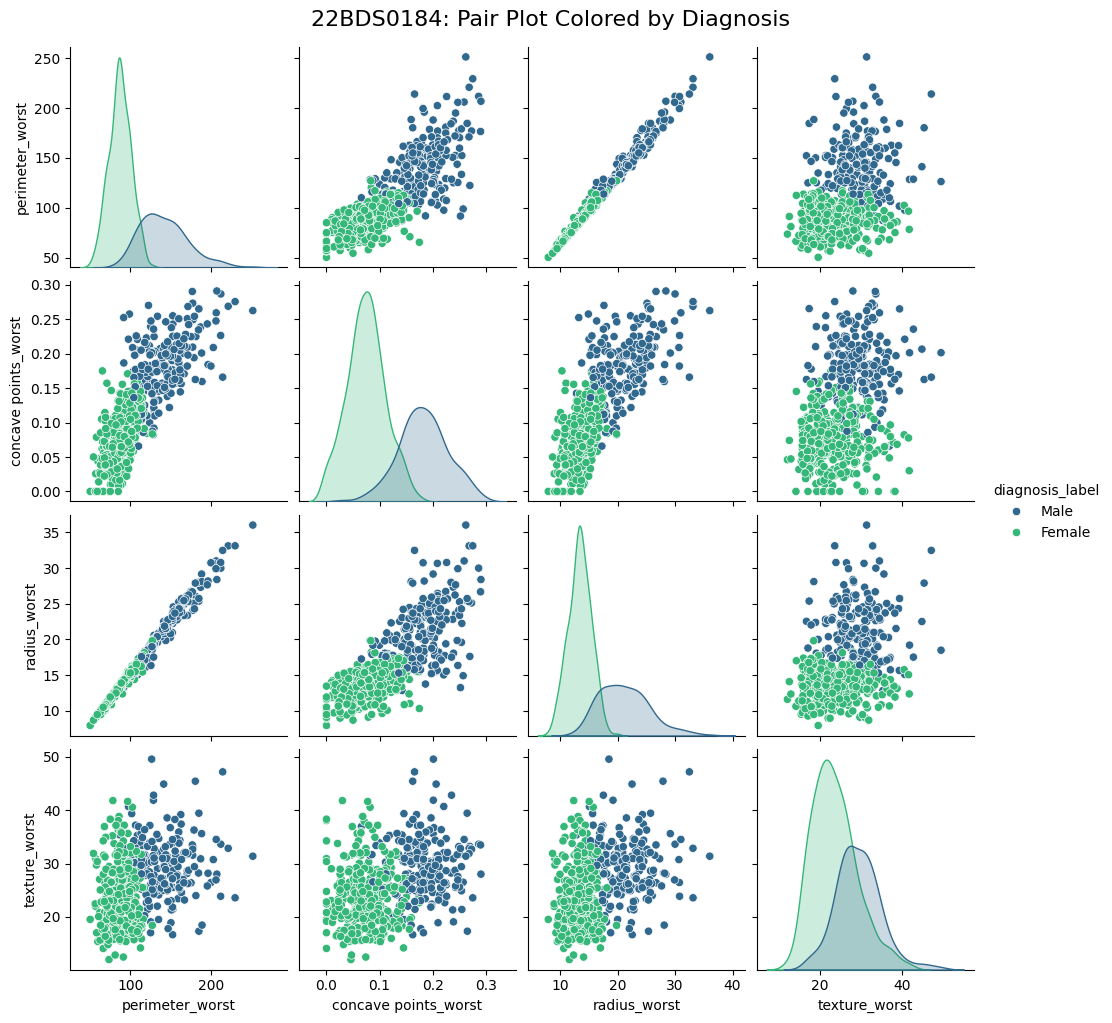

In [26]:
# Map diagnosis values to words
df['diagnosis_label'] = df['diagnosis'].map({1: 'Male', 0: 'Female'})

print("\n--- Generating Pair Plot with Hue ---")
sns.pairplot(
    df,
    vars=['perimeter_worst', 'concave points_worst', 'radius_worst', 'texture_worst'],
    hue="diagnosis_label",   # use the new column
    palette='viridis',
    height=2.5
)
plt.suptitle('22BDS0184: Pair Plot Colored by Diagnosis', y=1.02, fontsize=16)
plt.show()


Perfect multicollinearity between radius_worst and perimeter_worst - remove one before modeling.

Excellent class separation with concave_points_worst and geometric features (radius/perimeter) - highly predictive.

Malignant cases cluster in high values while benign cases stay in lower ranges across all features.

texture_worst shows poor discrimination with significant class overlap - consider dropping this feature

**# --- c) Calculate Pearson Correlation Coefficient ---**

In [27]:
# Example: radius_worst vs texture_worst
corr_pair = stats.pearsonr(df["radius_worst"], df["texture_worst"])

print("Correlation between 'radius_worst' and 'texture_worst':")
print(f" - P-value: {corr_pair[1]}")
print(f" - Correlation Coefficient: {corr_pair[0]}")

Correlation between 'radius_worst' and 'texture_worst':
 - P-value: 7.623197732295662e-19
 - Correlation Coefficient: 0.35992075422104824


Moderate positive correlation (r = 0.36) between radius_worst and texture_worst - weaker than geometric feature pairs

Highly significant relationship (p-value = 7.6e-19) despite moderate correlation - statistically reliable but not practically strong

**# --- d) Correlation Matrix ---**

In [28]:
# Generate full correlation matrix for numeric columns
correlation_matrix = df.select_dtypes(include=['number']).corr(method='pearson')
correlation_matrix

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413



--- Generating Correlation Heatmap ---


Text(0.5, 1.0, '22BDS0184: Heatmap of Feature Correlation')

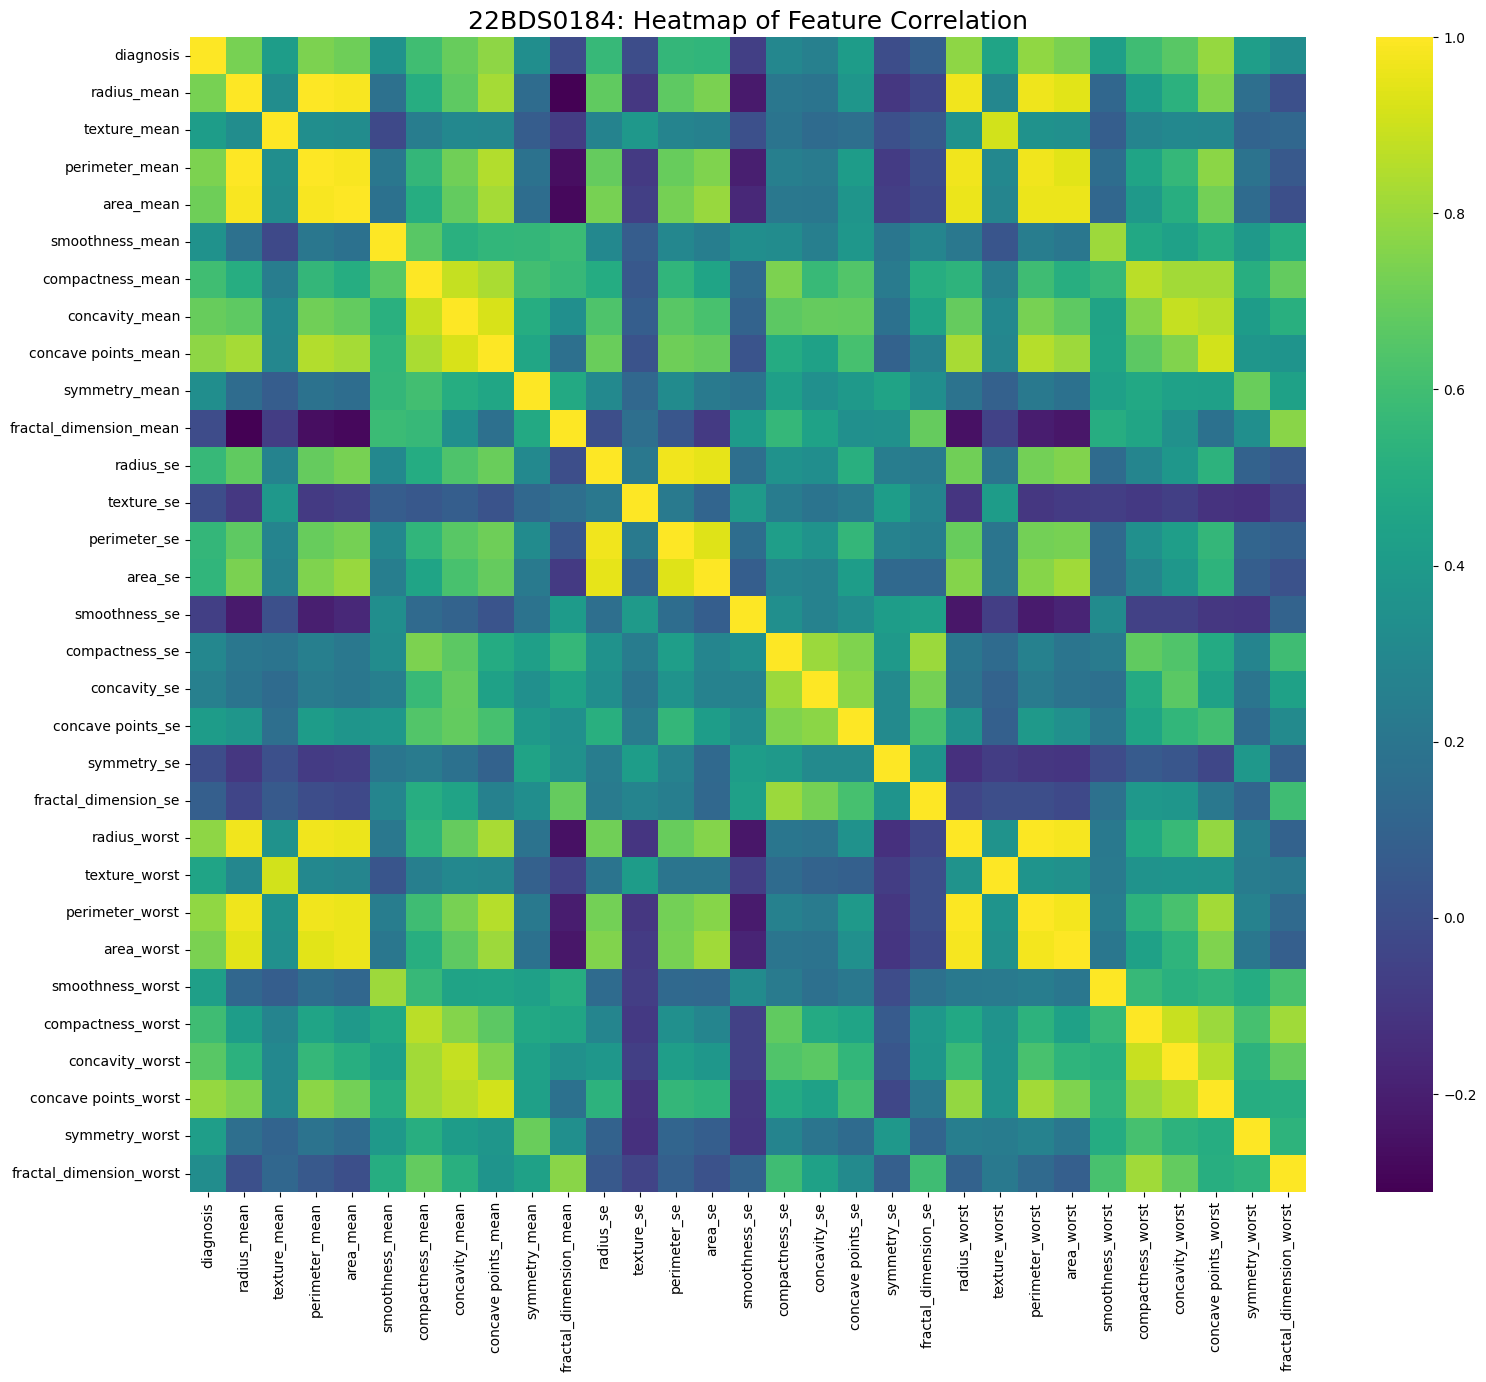

In [29]:
print("\n--- Generating Correlation Heatmap ---")
plt.figure(figsize=(18, 15))
sns.heatmap(
    correlation_matrix,
    annot=False,  # Annotations are turned off to keep the dense heatmap clean
    cmap='viridis'
)
plt.title('22BDS0184: Heatmap of Feature Correlation', fontsize=18)
# plt.show()

# -- Phase 2 --

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

In [31]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_label
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Male
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Male
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Male
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Male
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Male


In [34]:
# Show all column names
print("Columns in dataset:\n", df.columns)

Columns in dataset:
 Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_label'],
      dtype='object')


In [33]:
# Check datatypes
print("\nColumn data types:\n", df.dtypes)


Column data types:
 diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64

# No date Attribute So Time Series Can be Skipped as per instructions

### 1D ANALYSIS

In [35]:
# Choose one variable for 1D analysis
x = df['radius_mean']

In [37]:
print("Mean:", x.mean())

Mean: 14.127291739894552


In [38]:
print("Weighted Mean:", np.average(x, weights=np.arange(1, len(x)+1)))  # Example with position as w

Weighted Mean: 13.938784293774859


In [39]:
print("RMS:", np.sqrt((x**2).mean()))

RMS: 14.559445942873122


In [40]:
print("Harmonic Mean:", len(x)/np.sum(1/x))

Harmonic Mean: 13.349892508893035


In [41]:
print("Geometric Mean:", np.exp(np.log(x).mean()))

Geometric Mean: 13.72379092660631


In [42]:
print("Median:", x.median())

Median: 13.37


In [43]:
mode_val = x.mode()
print("Mode:", mode_val.iloc[0] if not mode_val.empty else np.nan)

Mode: 12.34


In [44]:
# Quartiles
print("\nQuartiles:\n", x.quantile([0.25,0.5,0.75]))


Quartiles:
 0.25    11.70
0.50    13.37
0.75    15.78
Name: radius_mean, dtype: float64


In [45]:
# Measures of Dispersion
print("\nRange:", x.min(), "to", x.max())
print("IQR:", x.quantile(0.75)-x.quantile(0.25))


Range: 6.981 to 28.11
IQR: 4.08


In [46]:
dec_10_90 = x.quantile([0.1,0.9])
print("Interdecile Range:", dec_10_90.loc[0.9]-dec_10_90.loc[0.1])

Interdecile Range: 9.270000000000001


In [49]:
print("Std Dev:", x.std())
print("Variance:", x.var())
print("Skewness:", skew(x))
print("Kurtosis:", kurtosis(x))

Std Dev: 3.524048826212078
Variance: 12.418920129526725
Skewness: 0.9398934455576345
Kurtosis: 0.8275836739140465


In [51]:
# Frequency Distribution

bins = 10
freq, edges = np.histogram(x, bins=bins)
print("\nFrequency Distribution:", freq)
print("Relative Frequency:", freq/len(x))


Frequency Distribution: [ 19  79 185 129  55  50  38   7   4   3]
Relative Frequency: [0.03339192 0.13884007 0.32513181 0.22671353 0.09666081 0.08787346
 0.06678383 0.01230228 0.00702988 0.00527241]


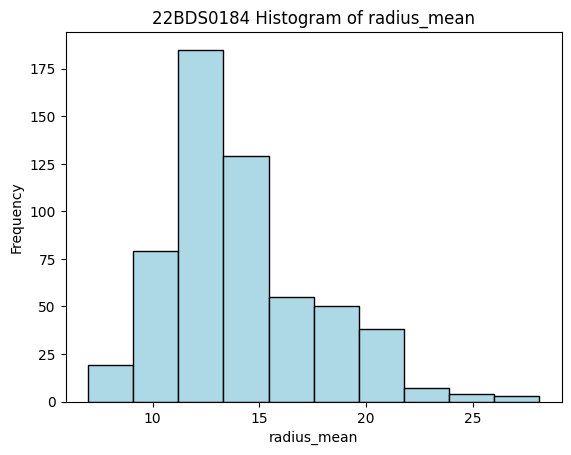

In [52]:
# Histogram
plt.hist(x, bins=10, color='lightblue', edgecolor='black')
plt.title("22BDS0184 Histogram of radius_mean")
plt.xlabel("radius_mean")
plt.ylabel("Frequency")
plt.show()

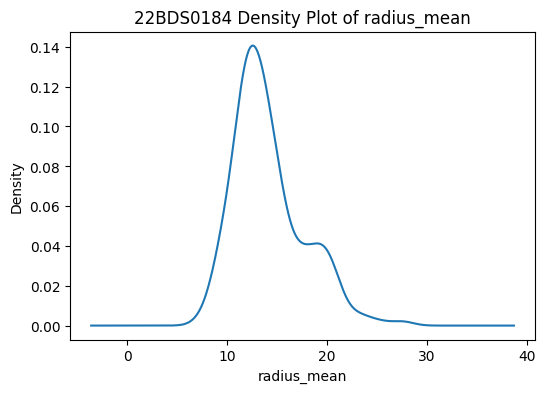

In [53]:
# Density Plot
plt.figure(figsize=(6,4))
x.plot(kind='kde')
plt.title("22BDS0184 Density Plot of radius_mean")
plt.xlabel("radius_mean")
plt.show()

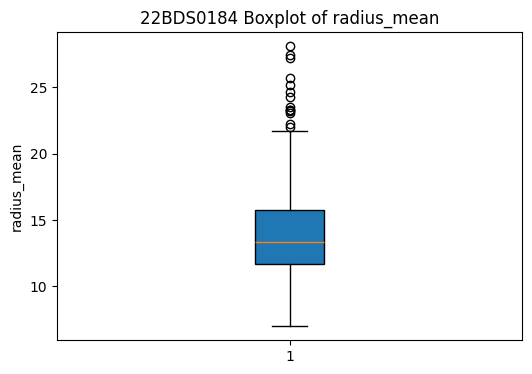

In [54]:
# Boxplot
plt.figure(figsize=(6,4))
plt.boxplot(x, vert=True, patch_artist=True)
plt.title("22BDS0184 Boxplot of radius_mean")
plt.ylabel("radius_mean")
plt.show()

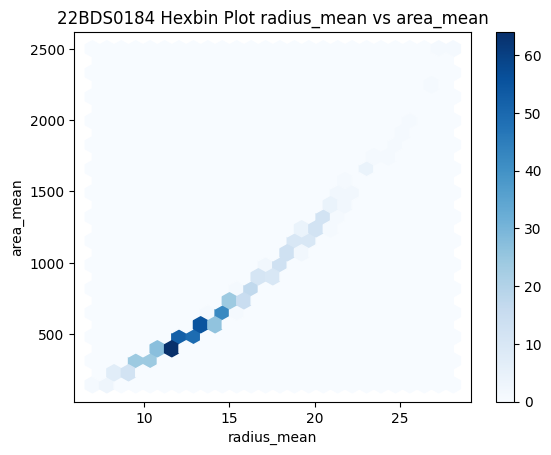

In [76]:
df.plot.hexbin(x='radius_mean', y='area_mean', gridsize=25, cmap='Blues')
plt.title("22BDS0184 Hexbin Plot radius_mean vs area_mean")
plt.show()

In [56]:
# Categorical Variable (diagnosis) Analysis

print("\n--- Frequency distribution of Diagnosis ---")
print(df['diagnosis'].value_counts())


--- Frequency distribution of Diagnosis ---
diagnosis
0    357
1    212
Name: count, dtype: int64


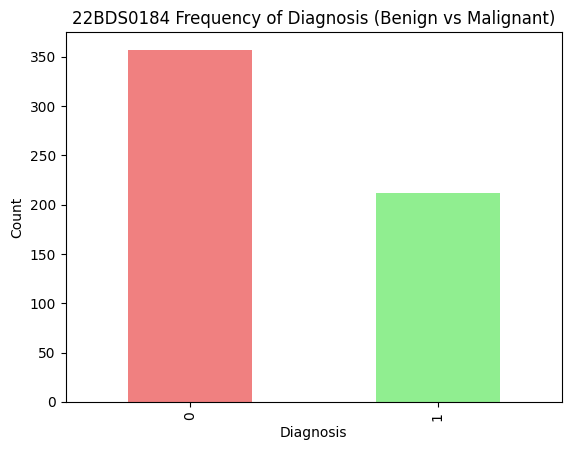

In [57]:
# Bar Plot
df['diagnosis'].value_counts().plot(kind='bar', color=['lightcoral','lightgreen'])
plt.title("22BDS0184 Frequency of Diagnosis (Benign vs Malignant)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

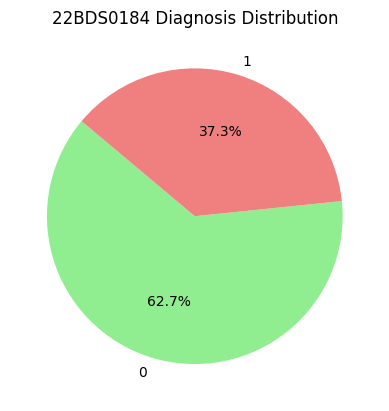

In [58]:
# Pie Chart
plt.pie(df['diagnosis'].value_counts(), labels=df['diagnosis'].value_counts().index,
        autopct='%1.1f%%', startangle=140, colors=['lightgreen','lightcoral'])
plt.title("22BDS0184 Diagnosis Distribution")
plt.show()

### 2D ANALYSIS

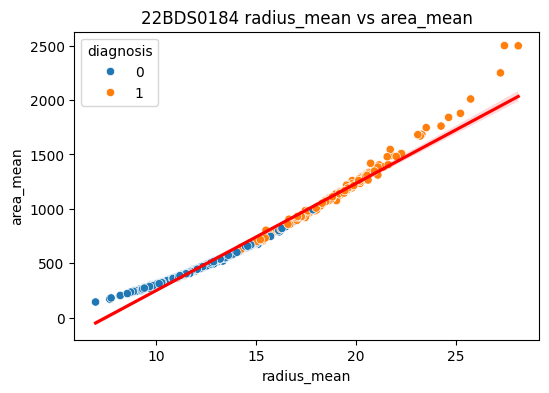

In [59]:
# =============================
# Numerical vs Numerical
# =============================
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='radius_mean', y='area_mean', hue='diagnosis')
sns.regplot(data=df, x='radius_mean', y='area_mean', scatter=False, color='red')
plt.title("22BDS0184 radius_mean vs area_mean")
plt.show()

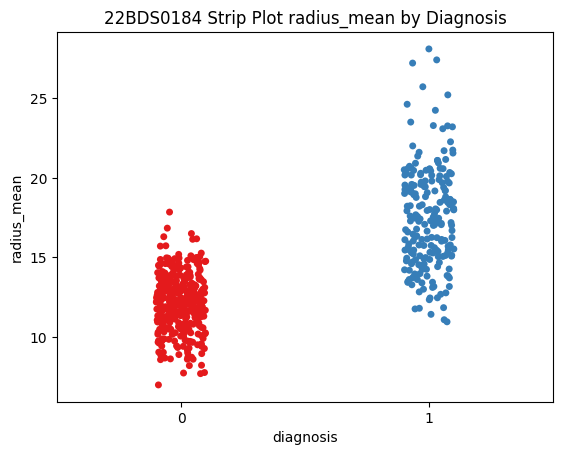

In [77]:
sns.stripplot(x='diagnosis', y='radius_mean', data=df, jitter=True, hue='diagnosis', palette='Set1', legend=False)
plt.title("22BDS0184 Strip Plot radius_mean by Diagnosis")
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


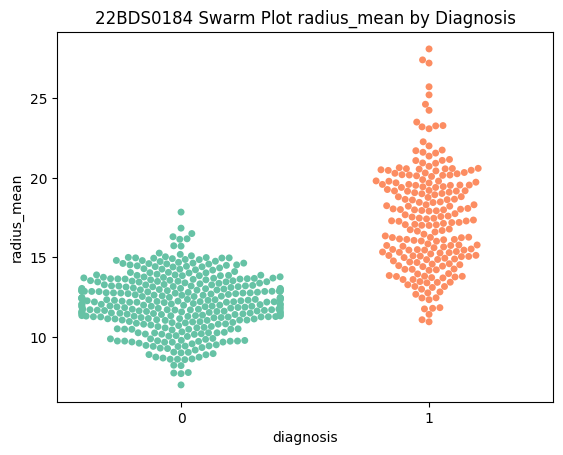

In [75]:
sns.swarmplot(x='diagnosis', y='radius_mean', data=df, hue='diagnosis', palette='Set2', legend=False)
plt.title("22BDS0184 Swarm Plot radius_mean by Diagnosis")
plt.show()

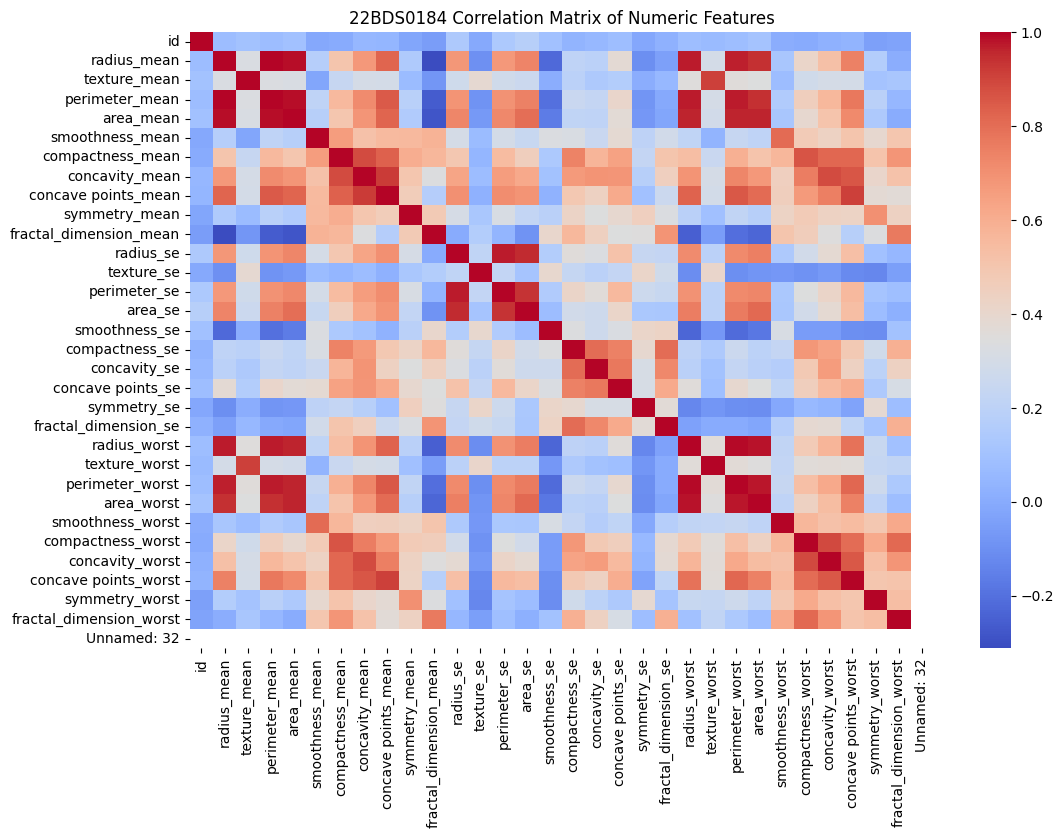

In [151]:
# Correlation matrix
plt.figure(figsize=(12,8))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("22BDS0184 Correlation Matrix of Numeric Features")
plt.show()


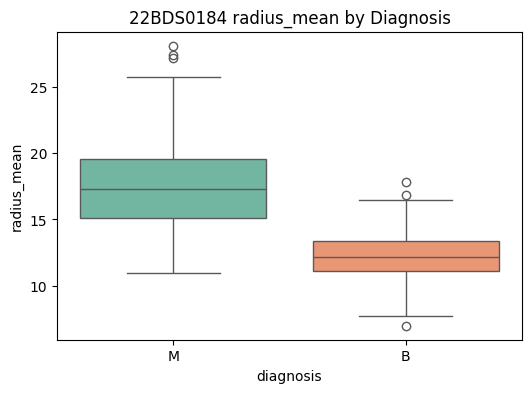

In [152]:
# =============================
# Numerical vs Categorical
# =============================
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='diagnosis', y='radius_mean', hue='diagnosis', palette='Set2', legend=False)
plt.title("22BDS0184 radius_mean by Diagnosis")
plt.show()

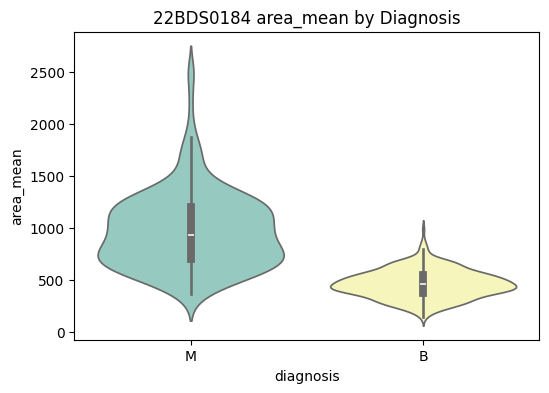

In [153]:
plt.figure(figsize=(6,4))
sns.violinplot(data=df, x='diagnosis', y='area_mean', hue='diagnosis', palette='Set3', legend=False)
plt.title("22BDS0184 area_mean by Diagnosis")
plt.show()

In [154]:
# =============================
# Categorical vs Categorical
# =============================
df['symmetry_bucket'] = pd.qcut(df['symmetry_mean'], q=3, labels=['Low','Medium','High'])

ct = pd.crosstab(df['diagnosis'], df['symmetry_bucket'])
print("\nCrosstab: Diagnosis vs Symmetry Bucket\n", ct)


Crosstab: Diagnosis vs Symmetry Bucket
 symmetry_bucket  Low  Medium  High
diagnosis                         
B                153     119    85
M                 37      70   105


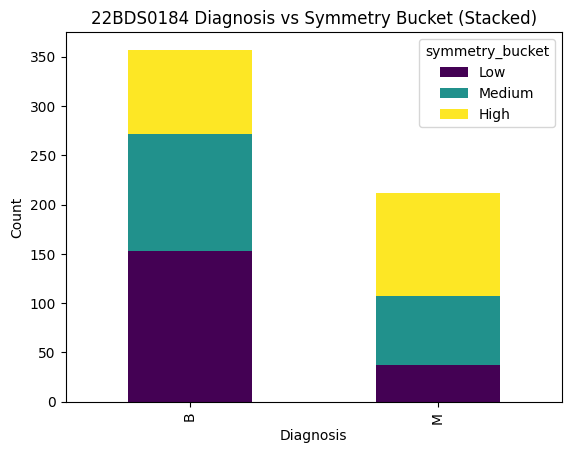

In [155]:
# Stacked bar
ct.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("22BDS0184 Diagnosis vs Symmetry Bucket (Stacked)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

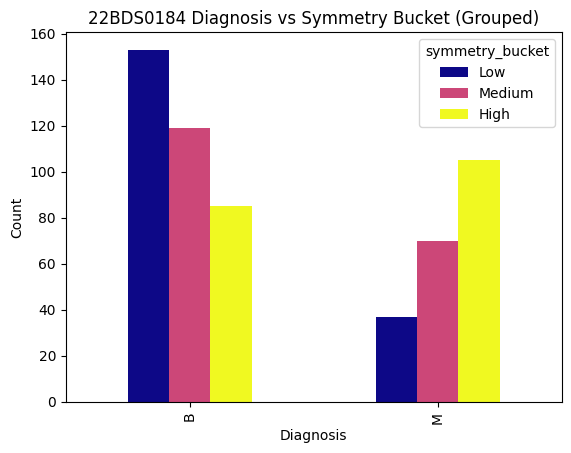

In [156]:

# Grouped bar
ct.plot(kind='bar', colormap='plasma')
plt.title("22BDS0184 Diagnosis vs Symmetry Bucket (Grouped)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

### 3D Analysis

Sizes range: 20.0 to 300.0


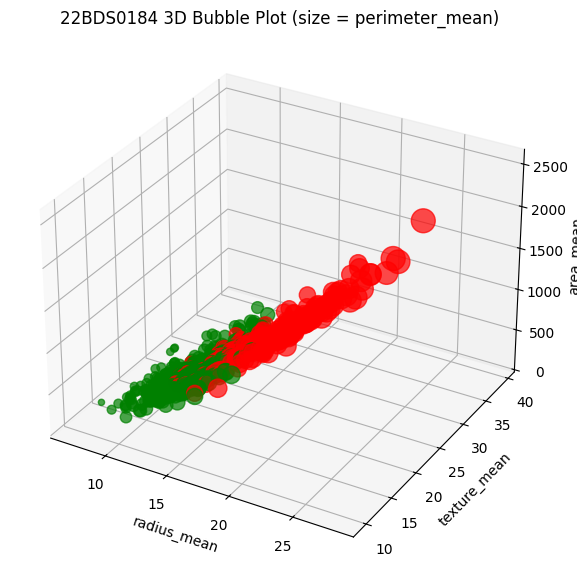

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

url = 'https://raw.githubusercontent.com/Vishall1221/EDA/main/Data/bcancer.csv'
df = pd.read_csv(url)

# Axes
x = df['radius_mean'].values
y = df['texture_mean'].values
z = df['area_mean'].values

# Bubble size = perimeter_mean, scaled to visible range [20, 300]
p = df['perimeter_mean'].values
s_min, s_max = 20, 300
sizes = s_min + (p - p.min()) * (s_max - s_min) / (p.max() - p.min())

# Color by diagnosis
colors = df['diagnosis'].map({'M':'red','B':'green'}).values

# Sanity check (optional)
print("Sizes range:", sizes.min(), "to", sizes.max())

# 3D Bubble Plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=sizes, c=colors, alpha=0.7, marker='o')

ax.set_xlabel('radius_mean')
ax.set_ylabel('texture_mean')
ax.set_zlabel('area_mean')
ax.set_title("22BDS0184 3D Bubble Plot (size = perimeter_mean)")
plt.show()


In [162]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[go.Scatter3d(
        x=df['radius_mean'],
        y=df['texture_mean'],
        z=df['area_mean'],
        mode='markers',
        marker=dict(
            size=(sizes/6),          # Plotly size is in px; shrink a bit
            color=df['diagnosis'].map({'M':'red','B':'green'}),
            opacity=0.7
        ),
        text=df['diagnosis']        # hover label
    )]
)
fig.update_layout(
    title="22BDS0184 3D Bubble Plot (size = perimeter_mean)",
    scene=dict(
        xaxis_title='radius_mean',
        yaxis_title='texture_mean',
        zaxis_title='area_mean'
    )
)
fig.show()


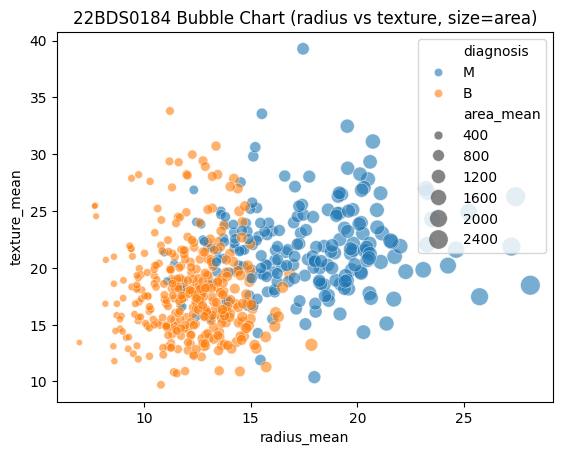

In [163]:
# Bubble Plot (Seaborn)
sns.scatterplot(data=df, x='radius_mean', y='texture_mean',
                size='area_mean', hue='diagnosis',
                sizes=(20,200), alpha=0.6)
plt.title("22BDS0184 Bubble Chart (radius vs texture, size=area)")
plt.show()


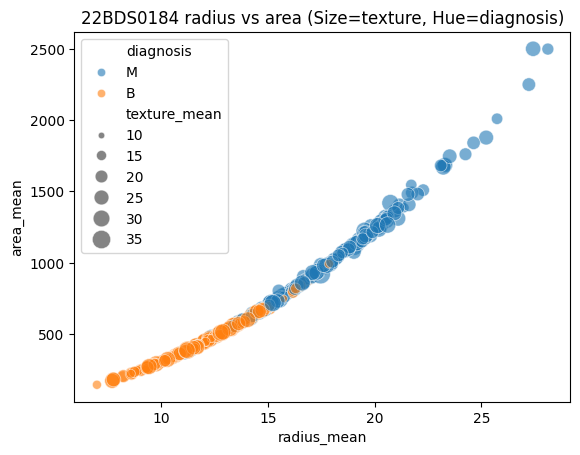

In [165]:
# bubble chart with multiple encodings

sns.scatterplot(data=df, x='radius_mean', y='area_mean',
                hue='diagnosis', size='texture_mean',
                sizes=(20,200), alpha=0.6)
plt.title("22BDS0184 radius vs area (Size=texture, Hue=diagnosis)")
plt.show()

In [147]:
# 3D Surface / Mesh (Plotly)

fig = go.Figure(data=[go.Mesh3d(
    x=df['radius_mean'],
    y=df['texture_mean'],
    z=df['area_mean'],
    opacity=0.5,
    color='cyan'
)])
fig.update_layout(title='22BDS0184 3D Surface of Tumor Features',
                  scene=dict(xaxis_title='radius_mean',
                             yaxis_title='texture_mean',
                             zaxis_title='area_mean'))
fig.show()

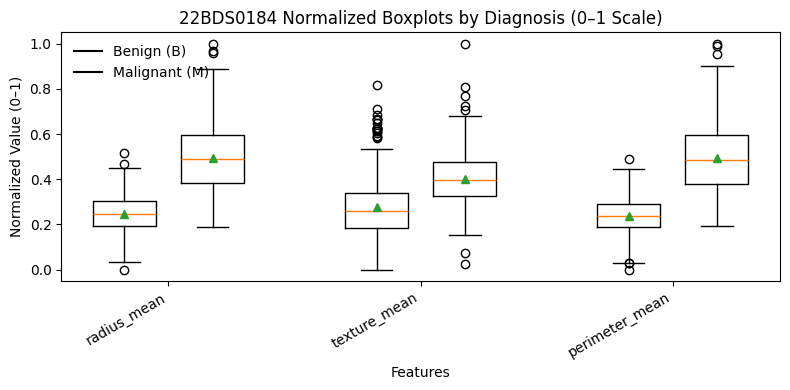

In [101]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Select features
features = ['radius_mean','texture_mean','perimeter_mean']

# Normalize to 0–1 scale
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[features])
df_scaled = pd.DataFrame(scaled, columns=features)
df_scaled['diagnosis'] = df['diagnosis']

# Plot
x = np.arange(len(features))*2.0
width = 0.5

fig, ax = plt.subplots(figsize=(8,4))

# Benign boxes
ax.boxplot([df_scaled[df_scaled['diagnosis']=='B'][f] for f in features],
           positions=x - 0.35, widths=width, showmeans=True)

# Malignant boxes
ax.boxplot([df_scaled[df_scaled['diagnosis']=='M'][f] for f in features],
           positions=x + 0.35, widths=width, showmeans=True)

# X ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(features, rotation=30, ha='right')
ax.set_title("22BDS0184 Normalized Boxplots by Diagnosis (0–1 Scale)")
ax.set_xlabel("Features")
ax.set_ylabel("Normalized Value (0–1)")

# Legend
benign = plt.Line2D([0],[0], color='black')
malig  = plt.Line2D([0],[0], color='black')
ax.legend([benign, malig], ['Benign (B)', 'Malignant (M)'], frameon=False, loc='upper left')

plt.tight_layout()
plt.show()


### Clustering

In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors

In [128]:
url = 'https://raw.githubusercontent.com/Vishall1221/EDA/main/Data/bcancer.csv'
df = pd.read_csv(url)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [129]:
# Select the features for clustering and visualization
features = ['radius_mean', 'texture_mean', 'area_mean']
X = df[features]

In [131]:
# Scale the data (essential for K-Means, Hierarchical, and DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

In [146]:
# K-Means Clustering - Elbow Method
wcss = []
k_range = range(1, 11)
for i in k_range:
    # Set n_init to 10 to avoid future warnings
    kmeans_model = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans_model.fit(X_scaled)
    wcss.append(kmeans_model.inertia_)

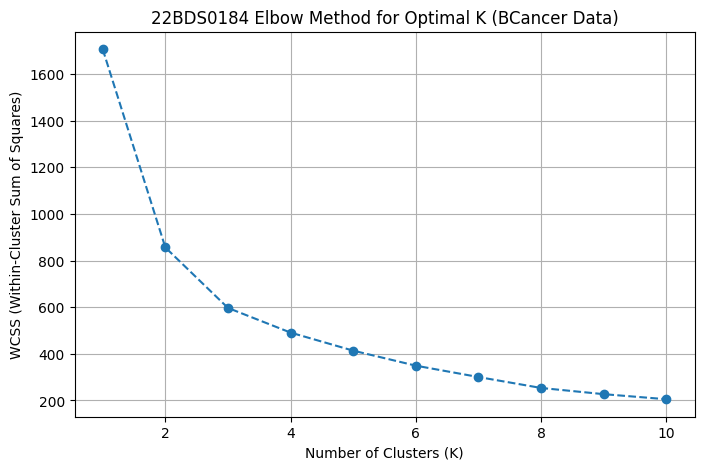

In [145]:
# Plotting the Elbow Method (Plot this to visually determine optimal K)
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('22BDS0184 Elbow Method for Optimal K (BCancer Data)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

In [135]:
# --- CLUSTERING EXECUTION ---
optimal_k = 2 # Using K=2 based on the Elbow plot result

# K-Means
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
X_scaled_df['KMeans_Cluster'] = kmeans_final.fit_predict(X_scaled)

# Hierarchical
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
X_scaled_df['Hierarchical_Cluster'] = hierarchical.fit_predict(X_scaled)

# DBSCAN (Using common parameters for scaled data)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
X_scaled_df['DBSCAN_Cluster'] = dbscan_labels


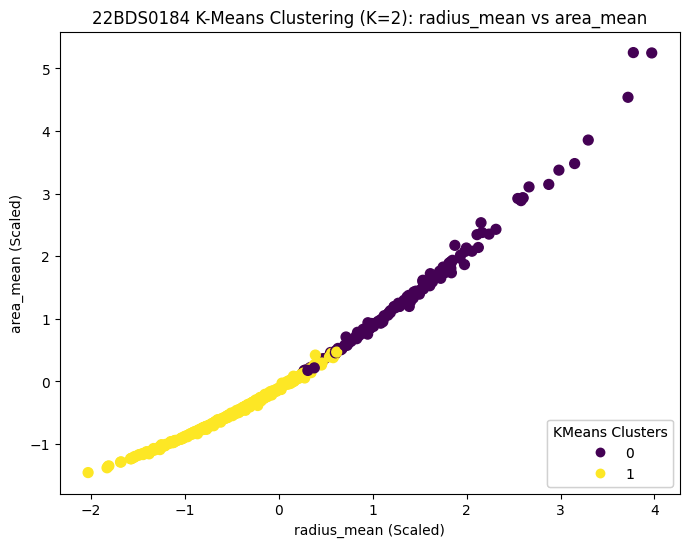

In [144]:
# K-Means
plt.figure(figsize=(8, 6))
scatter_kmeans = plt.scatter(X_scaled_df['radius_mean'], X_scaled_df['area_mean'],
                             c=X_scaled_df['KMeans_Cluster'], cmap='viridis', s=50)
plt.title(f'22BDS0184 K-Means Clustering (K={optimal_k}): radius_mean vs area_mean')
plt.xlabel('radius_mean (Scaled)')
plt.ylabel('area_mean (Scaled)')
legend_kmeans = plt.legend(*scatter_kmeans.legend_elements(), title="KMeans Clusters", loc='lower right')
plt.gca().add_artist(legend_kmeans)
plt.show()

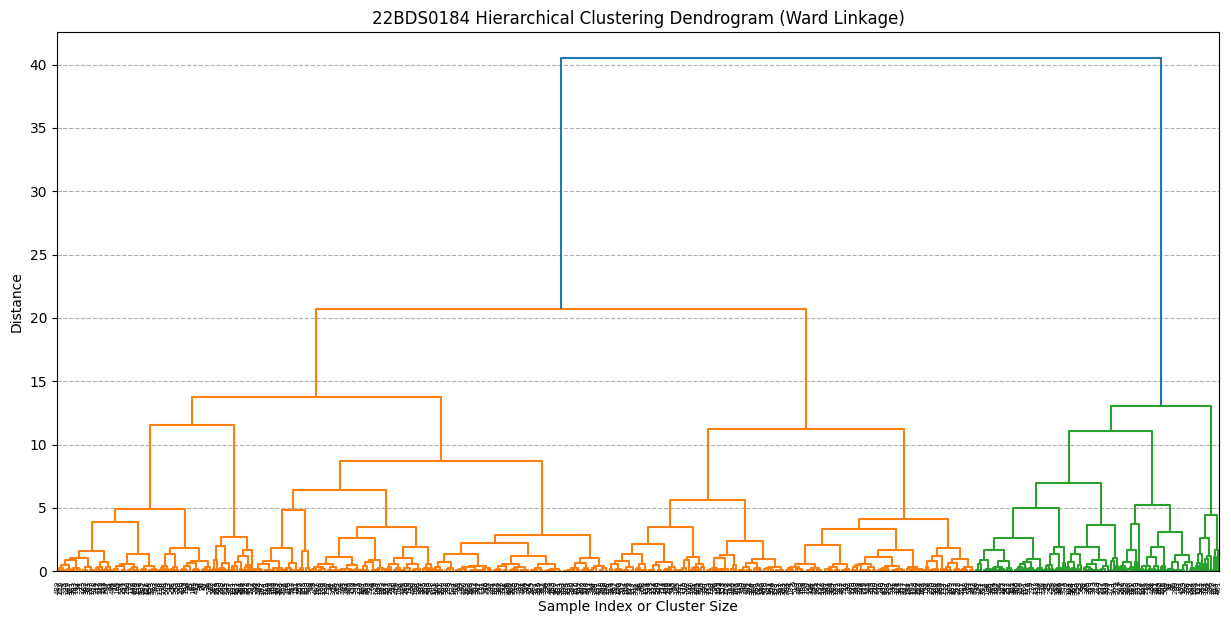

In [143]:
# ====================================
# 2. Hierarchical Clustering - Dendrogram
# ====================================
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(15, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('22BDS0184 Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.grid(axis='y', linestyle='--')
plt.show()

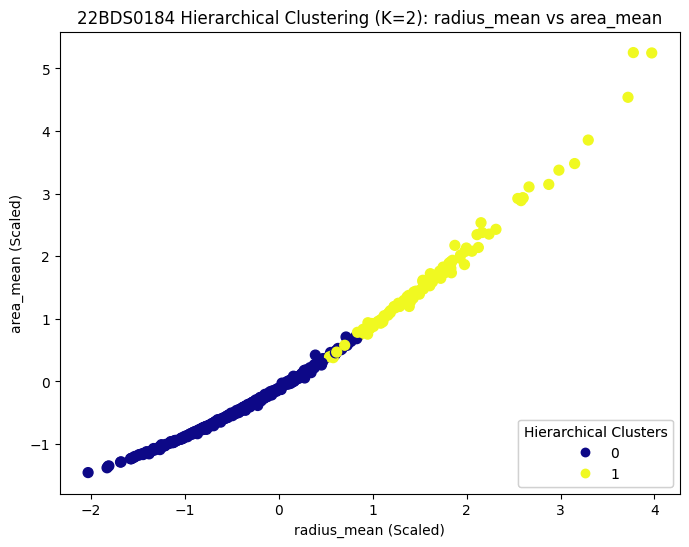

In [142]:
# Hierarchical Clustering 2D Plot
plt.figure(figsize=(8, 6))
scatter_hierarchical = plt.scatter(X_scaled_df['radius_mean'], X_scaled_df['area_mean'],
                                   c=X_scaled_df['Hierarchical_Cluster'], cmap='plasma', s=50)
plt.title(f'22BDS0184 Hierarchical Clustering (K={optimal_k}): radius_mean vs area_mean')
plt.xlabel('radius_mean (Scaled)')
plt.ylabel('area_mean (Scaled)')
legend_hierarchical = plt.legend(*scatter_hierarchical.legend_elements(), title="Hierarchical Clusters", loc='lower right')
plt.gca().add_artist(legend_hierarchical)
plt.show()

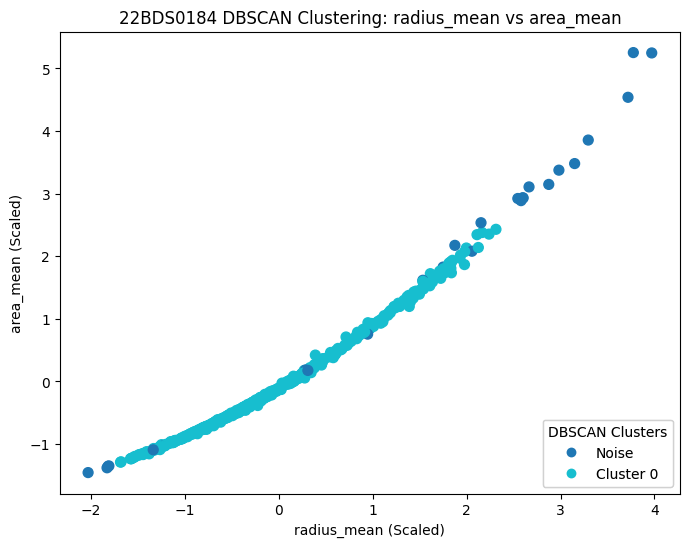

In [141]:
# DBSCAN Clustering 2D Plot
plt.figure(figsize=(8, 6))
scatter_dbscan = plt.scatter(X_scaled_df['radius_mean'], X_scaled_df['area_mean'],
                             c=X_scaled_df['DBSCAN_Cluster'], cmap='tab10', s=50)
plt.title('22BDS0184 DBSCAN Clustering: radius_mean vs area_mean')
plt.xlabel('radius_mean (Scaled)')
plt.ylabel('area_mean (Scaled)')
unique_labels = np.sort(np.unique(dbscan_labels))
legend_labels = [f'Cluster {i}' if i != -1 else 'Noise' for i in unique_labels]
legend_dbscan = plt.legend(handles=scatter_dbscan.legend_elements()[0], labels=legend_labels, title="DBSCAN Clusters", loc='lower right')
plt.gca().add_artist(legend_dbscan)
plt.show()